<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo70/blob/main/Semana4_5to11Oct/M%C3%B3dulo3_ActividadSemana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### **Módulo 3 - Actividad de Semana 4**

---

### Datos generales
---
> Nombre de la entrega: **Módulo 3 - Actividad de Semana 4**
---
* Equipo 70 - Integrantes: 

  * Javier Pérez Sanagustín
  * Herbert Joadan Romero Villarreal

* Matrículas: 

  * A01794233
  * A01794199

* Materia: Ciencia y analítica de datos (Gpo 10)

* Profesor titular: Jobish Vallikavungal

* Profesor tutor: Bernardo Charles Canales

* Fecha: 11 de octubre de 2022





### Pre-Requisito
En esta Actividad de la Semana 4, el objetivo principal es aplicar PCA al conjunto de datos para finalmente determinar la importancia de los componentes principales y generar una conclusión sobre el método.

PCA requiere que los datos de entrada se encuentren limpios, es decir, que no existan valores nulos o que generen ruido. Por ello, en esta sección que hemos nombrado como pre-requisito, importaremos la base de datos cuya limpieza se aplicó en la Actividad 3 de este mismo módulo.






Se inicia con la importación de la Base de datos limpia. Se importan las librerías de pandas, numpy  y seaborn como parte de la práctica. Se crea el data frame con los datos ya limpios.

In [13]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns

# Path del csv
csv_path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo70/main/Semana4_5to11Oct/clean_db.csv'
clean_df = pd.read_csv(csv_path, index_col=0) # csv a un DataFrame
df = clean_df.copy() # Copia para trabajar el DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.000000,2.000000,1.000000,1.000000,1.840343,...,1.840343,1.840343,1.840343,1.840343,689.0,1.840343,1.840343,1.840343,1.840343,1.000000
2,120000,2.0,2.0,2.0,26.0,1.000000,2.000000,1.840343,1.840343,1.840343,...,3272.000000,3455.000000,3261.000000,1.840343,1000.0,1000.000000,1000.000000,1.840343,2000.000000,1.000000
3,90000,2.0,2.0,2.0,34.0,1.840343,1.840343,1.840343,1.840343,1.840343,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.0,1000.000000,1000.000000,1000.000000,5000.000000,1.840343
4,50000,2.0,2.0,1.0,37.0,1.840343,1.840343,1.840343,1.840343,1.840343,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.0,1200.000000,1100.000000,1069.000000,1000.000000,1.840343
5,50000,1.0,2.0,1.0,57.0,1.000000,1.840343,1.000000,1.840343,1.840343,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.0,10000.000000,9000.000000,689.000000,679.000000,1.840343


## Parte 1: Ejercicio guiado 

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.


Recordemos que PCA es un método que se aplica solo a variables continuas (numéricas), por lo que con info, podremos ver a detalle el tipo de las columnas.

In [14]:
df.info() # Vemos el tipo de las columnas del df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

Tenemos todas las variables continuas, entonces llevaremos a cabo el análisis para todas las variables.

Veamos la correlación que existe entre las variables, esto nos dará una idea del trabajo que PCA puede hacer.

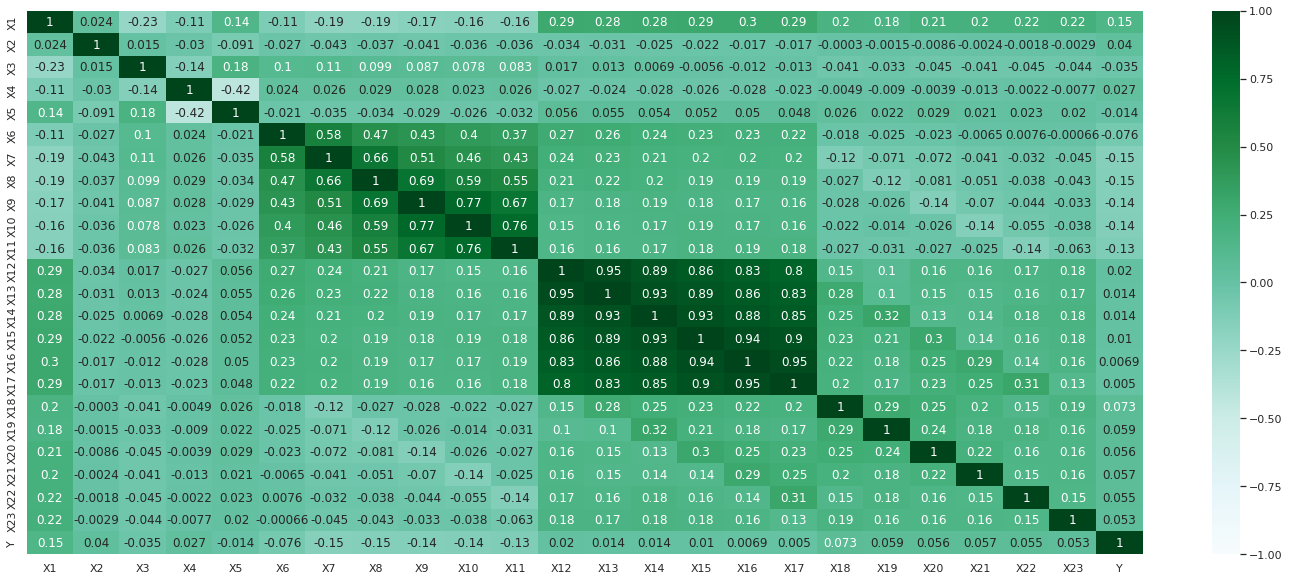

In [17]:
# Generamos matriz de correlación
corrs = df.corr()
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Las casillas con verde oscuro o de color blanco son las que están
mayor correlacionadas. Mientras más oscuro es el verde, más estrecha es la correlación positiva (a medida que uno crece, la otra también lo hace). El hecho que algunas variables estén más correlacionadas significa para el
modelo información repetida.

El método PCA utiliza las varianzas para determinar correlaciones y separar en componentes dicha información, por lo que veremos como son las varianzas de la información original.

In [68]:
#Buscamos la varianza total de todas las variables
var_total = df.var().sum()

#Calculamos la varianza de cada columna
lista_varianza_original = {}
for column in df.columns:
  lista_varianza_original[column] = [((df[column].var()/var_total)*100)]
temp_df = pd.DataFrame(lista_varianza_original)
display(temp_df)
print('Varianza Total \t:',var_total)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,37.065492,5.267227e-10,1.215984e-09,5.906793e-10,1.869677e-07,5.231729e-10,4.097346e-10,4.050689e-10,4.426590e-10,4.300312e-10,...,9.108927,8.134743,7.793537,0.60453,1.170588,0.683463,0.541147,0.514511,0.696845,2.678544e-10


Varianza Total 	: 45410881790.50481


Como podemos ver, las varianzas son muy diferentes para cada tipo de dato. Por ello, si aplicamos PCA, tomaría algunas variables como más importantes cuando en realidad no lo son. Por ello, requerimos aplicar una transformación y tener los datos en el mismo rango.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.137363,0.809689,0.2137,-1.071738,-1.246282,0.783531,0.656020,-1.672264,-1.612069,0.264246,...,-0.674051,-0.664694,-0.656071,-0.341800,-0.227149,-0.296701,-0.308017,-0.314033,-0.293408,-1.876689
1,-0.366561,0.809689,0.2137,0.859125,-1.029224,-1.268126,0.656020,0.287120,0.262275,0.264246,...,-0.623204,-0.607878,-0.601286,-0.341800,-0.213660,-0.240041,-0.244342,-0.314033,-0.181080,-1.876689
2,-0.597802,0.809689,0.2137,0.859125,-0.160996,0.455970,0.285882,0.287120,0.262275,0.264246,...,-0.451252,-0.418779,-0.394728,-0.250291,-0.191973,-0.240041,-0.244342,-0.248731,-0.012432,0.532853
3,-0.906122,0.809689,0.2137,-1.071738,0.164590,0.455970,0.285882,0.287120,0.262275,0.264246,...,-0.233834,-0.188251,-0.159426,-0.221200,-0.169462,-0.228689,-0.237963,-0.244217,-0.237296,0.532853
4,-0.906122,-1.235043,0.2137,-1.071738,2.335161,-1.268126,0.285882,-1.672264,0.262275,0.264246,...,-0.348490,-0.349708,-0.334516,-0.221200,1.333952,0.270831,0.265998,-0.269077,-0.255341,0.532853


Una vez que realizamos la transformación estándar podemos ver que los datos se aproximan al 0, en lugar de tener valores de magnitudes muy grandes o muy pequeñas. Observamos ahora las varianzas:

In [74]:
summary = {
"Varianzas": scaled_df[df.columns.values].var()[0:25],
"Valor Min": scaled_df[df.columns.values].min()[0:25],
"Valor Max": scaled_df[df.columns.values].max()[0:25]
}

# Podemos ver como DataFrame las varianzas
pd.DataFrame(summary, index = df.columns.values).transpose()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,...,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.235043,-1.132047,-1.071738,-1.571867,-1.268126,-1.662313,-1.672264,-1.612069,-1.637419,...,-0.674064,-0.664708,-0.656085,-0.341851,-0.256990,-0.296748,-0.308071,-0.314088,-0.293455,-1.876689
Valor Max,6.416489,0.809689,2.905194,2.789988,4.722789,13.093470,14.566023,14.649265,14.001086,14.203317,...,13.188910,14.590381,15.509182,52.381950,72.795294,50.565615,39.307010,27.590609,29.425929,0.532853


Con el DataFrame de arriba podemos ver que los valores se han reducido y que las varianzas han quedado todas de la misma magnitud.

Ahora procedemos a aplicar PCA. De los datos obtenidos creamos un DataFrame para visualizar los datos de la varianza explicada y la varianza acumulada.

In [76]:
from sklearn.decomposition import PCA
pcs = PCA()
# Aplicamos PCA a nuestro conjunto de datos escalado
pcs_t = pcs.fit_transform(scaled_df)
pcsSummary_df = pd.DataFrame({
  '% varianza explicada': np.round(pcs.
  explained_variance_ratio_,4) * 100,
  '% varianza acumulada': np.cumsum(pcs.
  explained_variance_ratio_) * 100
})
pcs_labels = [f'Component_{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
Component_1,26.30,26.296402
Component_2,16.00,42.297403
Component_3,6.42,48.713176
Component_4,6.10,54.813329
Component_5,4.33,59.139011
Component_6,4.28,63.416768
Component_7,4.16,67.572781
Component_8,3.93,71.503168
Component_9,3.74,75.238182
Component_10,3.63,78.863585


Podemos ver que tenemos la lista de componentes, que por definición, no son lo mismo que las variables de entrada. Estos componentes separan la relación entre variables de tal manera que podemos tener la información de forma más atómica.

Ahora veamos las varianzas entre variables para los datos escalados.

In [78]:
total_var =scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *
100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166667
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


Con esta información podemos responder la pregunta de la Parte 1.
Podemos ver que con los 12 primeros Componentes, estamos abarcando el 85% de la información, en cambio, necesitaríamos al menos 21 componentes para abarcar el mismo porcentaje si usáramos el conjunto de datos sin PCA.

**Paso 2: Interprete cada componente principal en términos de las variables originales**

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.